# Model development and training

In [1]:
!pip install numpy pandas tensorflow keras matplotlib

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ==========================================
# 1. LOAD DATASET FROM CSV
# ==========================================
# Load the synthetic dataset
df = pd.read_csv('xor_synthetic_dataset.csv')

# Extract features and labels
X = df[['x1', 'x2']].values
y = df['y'].values


In [4]:
# ==========================================
# 2. DATA PREPROCESSING
# ==========================================
# No extensive preprocessing needed as data is already normalized
# But we'll add a validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")


# ==========================================
# 3. BUILD THE DEEP LEARNING MODEL
# ==========================================
model = Sequential([
    # Input layer: 2 features
    Dense(4, input_dim=2, activation='relu', name='input'),

    # Second hidden layer
    Dense(4, activation='relu', name='hidden2'),

    # Output layer: 1 neuron with sigmoid activation
    Dense(1, activation='sigmoid', name='output')
])

# Display model architecture
model.summary()

# ==========================================
# 4. COMPILE THE MODEL
# ==========================================
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

"""
Mathematical Derivation:

1. Forward Propagation:
   - Layer 1: z₁ = W₁·x + b₁, a₁ = ReLU(z₁)
   - Layer 2: z₂ = W₂·a₁ + b₂, a₂ = ReLU(z₂)
   - Output: z₃ = W₃·a₂ + b₃, ŷ = σ(z₃) = 1/(1+e⁻ᶻ³)

2. Loss Function (Binary Cross-Entropy):
   L = -[y·log(ŷ) + (1-y)·log(1-ŷ)]

3. Backpropagation:
   - Output layer: δ₃ = ŷ - y
   - Hidden layer 2: δ₂ = (W₃ᵀ·δ₃) ⊙ ReLU'(z₂)
   - Hidden layer 1: δ₁ = (W₂ᵀ·δ₂) ⊙ ReLU'(z₁)

   Weight updates:
   W₃ = W₃ - η·(a₂·δ₃)
   W₂ = W₂ - η·(a₁·δ₂)
   W₁ = W₁ - η·(x·δ₁)

4. Adam Optimizer:
   - Adaptive learning rates for each parameter
   - Combines momentum and RMSprop properties
"""

# ==========================================
# 5. TRAIN THE MODEL
# ==========================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    batch_size=16,
    verbose=1
)

Training samples: 280
Validation samples: 120


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5036 - loss: 0.7669 - val_accuracy: 0.6750 - val_loss: 0.6680
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6179 - loss: 0.7371 - val_accuracy: 0.7417 - val_loss: 0.6528
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6679 - loss: 0.7130 - val_accuracy: 0.7583 - val_loss: 0.6403
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7107 - loss: 0.6951 - val_accuracy: 0.7833 - val_loss: 0.6328
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.6829 - val_accuracy: 0.7917 - val_loss: 0.6270
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.6723 - val_accuracy: 0.8000 - val_loss: 0.6212
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.6625 - val_accuracy: 0.8000 - val_loss: 0.6153
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.6533 - val_accuracy: 0.8083 - 

In [5]:
# ==========================================
# 6. EVALUATE THE MODEL
# ==========================================
# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Test on ideal XOR cases
test_cases = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

predictions = model.predict(test_cases)
print("\nPredictions for ideal XOR cases:")
for i, case in enumerate(test_cases):
    pred = predictions[i][0]
    true_label = 0 if (case[0] == case[1]) else 1
    print(f"Input: {case} → Prediction: {pred:.4f} (True: {true_label})")




Training Accuracy: 1.0000
Training Loss: 0.0038
Validation Accuracy: 1.0000
Validation Loss: 0.0032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Predictions for ideal XOR cases:
Input: [0 0] → Prediction: 0.0070 (True: 0)
Input: [0 1] → Prediction: 1.0000 (True: 1)
Input: [1 0] → Prediction: 1.0000 (True: 1)
Input: [1 1] → Prediction: 0.0070 (True: 0)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


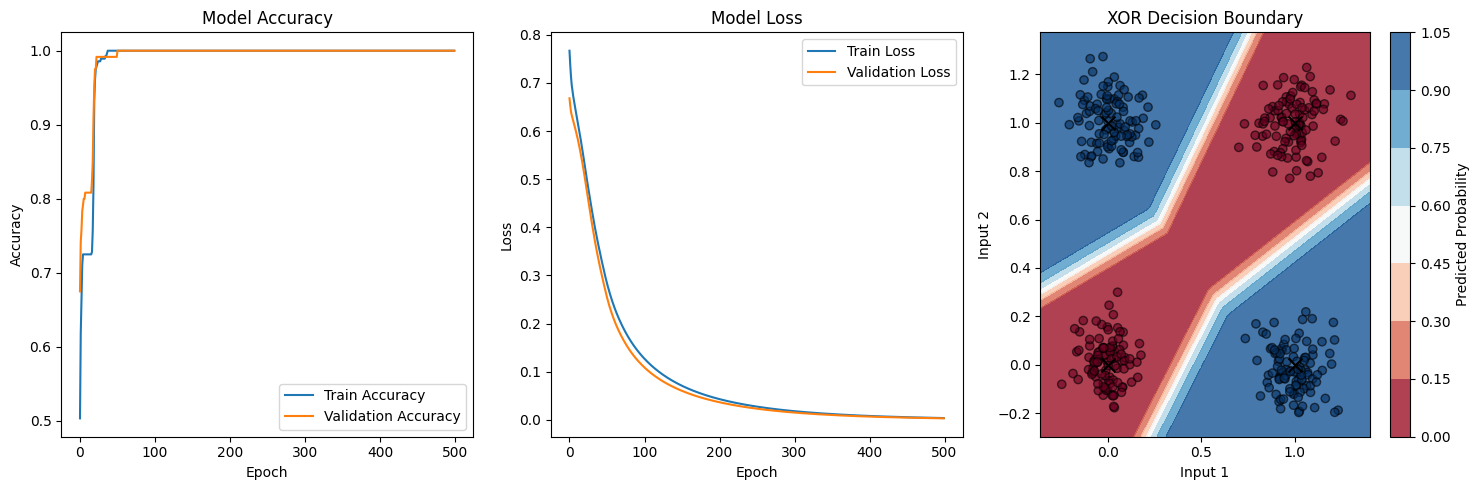

In [6]:
# ==========================================
# 7. VISUALIZE RESULTS
# ==========================================
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot decision boundary
plt.subplot(1, 3, 3)
# Create a grid of points
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict over the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.colorbar(label='Predicted Probability')

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=plt.cm.RdBu, edgecolors='k', alpha=0.6)

# Plot ideal XOR points
plt.scatter(test_cases[:, 0], test_cases[:, 1], c='black', s=100, marker='x')

plt.title('XOR Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')

plt.tight_layout()
plt.show()



Model Weights Analysis:
Hidden Layer 1 Weights Shape: (2, 4)
Hidden Layer 1 Biases Shape: (4,)
Hidden Layer 2 Weights Shape: (4, 4)
Hidden Layer 2 Biases Shape: (4,)
Output Layer Weights Shape: (4, 1)
Output Layer Biases Shape: (1,)


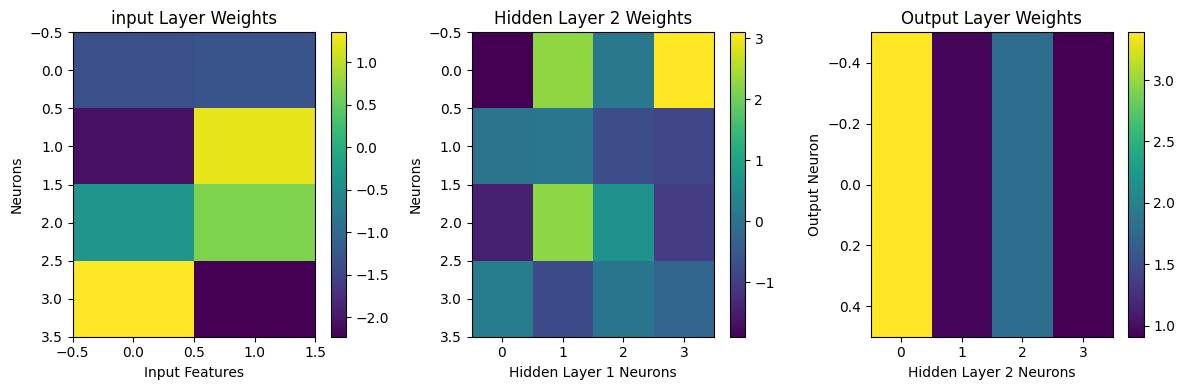

In [7]:
# ==========================================
# 8. MODEL ANALYSIS
# ==========================================
# Get weights for analysis
weights = model.get_weights()
print("\nModel Weights Analysis:")
print(f"Hidden Layer 1 Weights Shape: {weights[0].shape}")
print(f"Hidden Layer 1 Biases Shape: {weights[1].shape}")
print(f"Hidden Layer 2 Weights Shape: {weights[2].shape}")
print(f"Hidden Layer 2 Biases Shape: {weights[3].shape}")
print(f"Output Layer Weights Shape: {weights[4].shape}")
print(f"Output Layer Biases Shape: {weights[5].shape}")

# Visualize learned weights
plt.figure(figsize=(12, 4))

# Hidden layer 1 weights
plt.subplot(1, 3, 1)
plt.imshow(weights[0].T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('input Layer Weights')
plt.xlabel('Input Features')
plt.ylabel('Neurons')

# Hidden layer 2 weights
plt.subplot(1, 3, 2)
plt.imshow(weights[2].T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Hidden Layer 2 Weights')
plt.xlabel('Hidden Layer 1 Neurons')
plt.ylabel('Neurons')

# Output layer weights
plt.subplot(1, 3, 3)
plt.imshow(weights[4].T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Output Layer Weights')
plt.xlabel('Hidden Layer 2 Neurons')
plt.ylabel('Output Neuron')

plt.tight_layout()
plt.show()



# Saving the Model


In [8]:

from tensorflow.keras.models import model_from_json
import os

# Create the "model" directory if it doesn't exist
os.makedirs("model", exist_ok=True)

# Save loaded_model architecture to JSON
model_json = model.to_json()
with open('model/xor_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save loaded_model weights to HDF5
model.save_weights('model/xor_model_weights.weights.h5')



print("Model saved to model/xor_model.json and model/xor_model_weights.weights.h5")

Model saved to model/xor_model.json and model/xor_model_weights.weights.h5
